# AI Algorithm System for Prediction of Diabetes Using Progressive Web App and Cloud

### Dataset
    Gender : 0 -Male, 1 - Female
    Pregnancies: Number of times pregnant
    BloodPressure : Diastolic blood pressure (mm Hg)
    Urination_frequency : No. of times the person urinates in a day 
    BMI : Body mass index (weight in kg/(height in m)^2)
    Hereditary : If the person's parents have diabetes, 0 - No, 1 - Yes
    Age : Age (years)
    Outcome : 0 to 1

### Aim of the project
        To build a machine learning model to accurately predict whether or not the patients in the dataset
        have diabetes or not?


In [1]:
#importing Libraries
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#for warning 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#Load the dataset
data = pd.read_csv(r"C:\Users\Faiz\Desktop\Diabetes_Prediction_PWA_Final-main\diabetes.csv")

## Data Exploration

In [3]:
data.shape

(767, 8)

In [4]:
len(data)

767

In [5]:
data.ndim,data.size

(2, 6136)

In [6]:
data.head()

,Gender,Pregnancies,BloodPressure,Urination_frequency,BMI,Hereditary,Age,Outcome
0,0,0,72,35,33.6,1,50,1
1,1,1,66,29,26.6,0,31,0
2,0,0,64,0,23.3,1,32,1
3,0,0,66,23,28.1,1,21,0
4,0,0,40,35,43.1,0,33,1


In [7]:
data.tail()

,Gender,Pregnancies,BloodPressure,Urination_frequency,BMI,Hereditary,Age,Outcome
762,1,9,62,0,22.5,1,33,0
763,0,0,76,48,32.9,1,63,0
764,1,2,70,27,36.8,1,27,0
765,1,5,72,23,26.2,0,30,0
766,1,1,60,0,30.1,0,47,1


In [8]:
data.isna().sum()

Gender                 0
Pregnancies            0
BloodPressure          0
Urination_frequency    0
BMI                    0
Hereditary             0
Age                    0
Outcome                0
dtype: int64

In [9]:
data.describe()

,Gender,Pregnancies,BloodPressure,Urination_frequency,BMI,Hereditary,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,0.508475,1.988266,69.104302,20.522816,31.994654,0.464146,33.254237,0.349413
std,0.500254,3.134266,19.368410,15.958143,7.889095,0.499038,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,0.000000,0.000000,62.000000,0.000000,27.300000,0.000000,24.000000,0.000000
50%,1.000000,0.000000,72.000000,23.000000,32.000000,0.000000,29.000000,0.000000
75%,1.000000,3.000000,80.000000,32.000000,36.600000,1.000000,41.000000,1.000000
max,1.000000,17.000000,122.000000,99.000000,67.100000,1.000000,81.000000,1.000000


In [10]:
data["Outcome"].value_counts()

0    499
1    268
Name: Outcome, dtype: int64

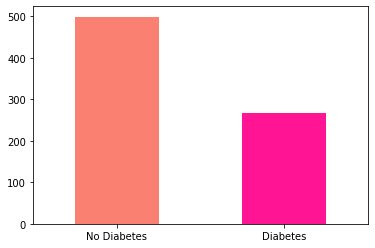

In [11]:
data["Outcome"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               767 non-null    int64  
 1   Pregnancies          767 non-null    int64  
 2   BloodPressure        767 non-null    int64  
 3   Urination_frequency  767 non-null    int64  
 4   BMI                  767 non-null    float64
 5   Hereditary           767 non-null    int64  
 6   Age                  767 non-null    int64  
 7   Outcome              767 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 48.1 KB


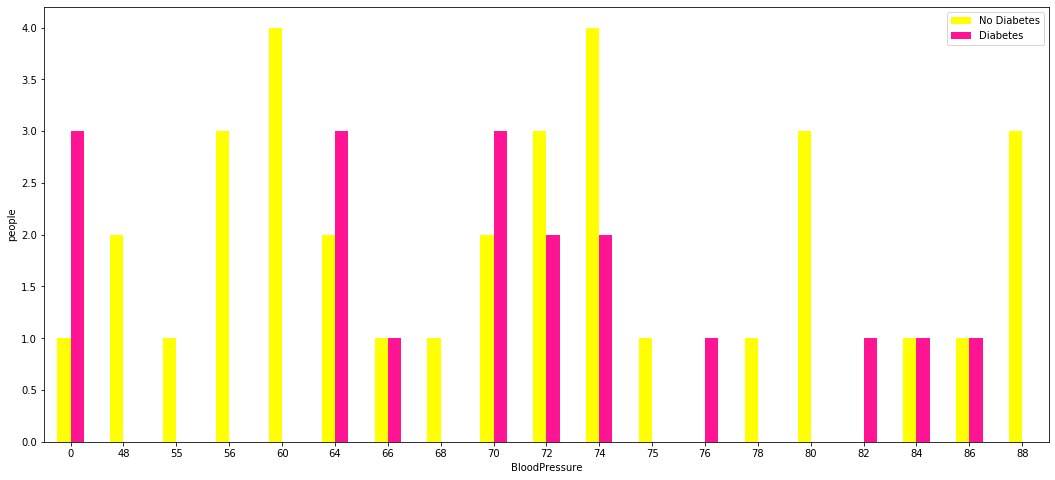

In [13]:
# Comparing Glucose with the Outcome
pd.crosstab(data.BloodPressure[::15],data.Outcome).plot(kind="bar",figsize=(18,8),color=["yellow","deeppink"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

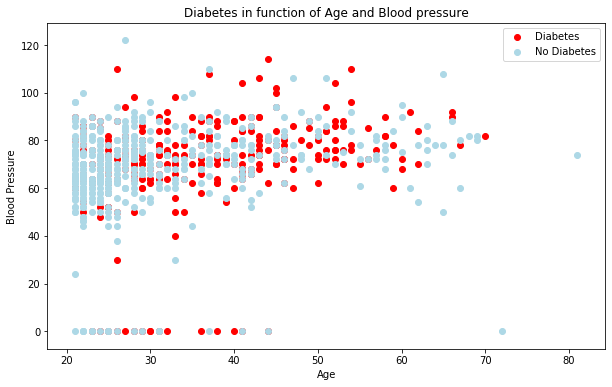

In [14]:
#finding out the Blood Pressure and age of entries who have diabetes
plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(data.Age[data.Outcome==1],data.BloodPressure[data.Outcome==1],c="Red");

# Scatter with negative example
plt.scatter(data.Age[data.Outcome==0],data.BloodPressure[data.Outcome==0],c="lightblue");

# Add some helpful info
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);


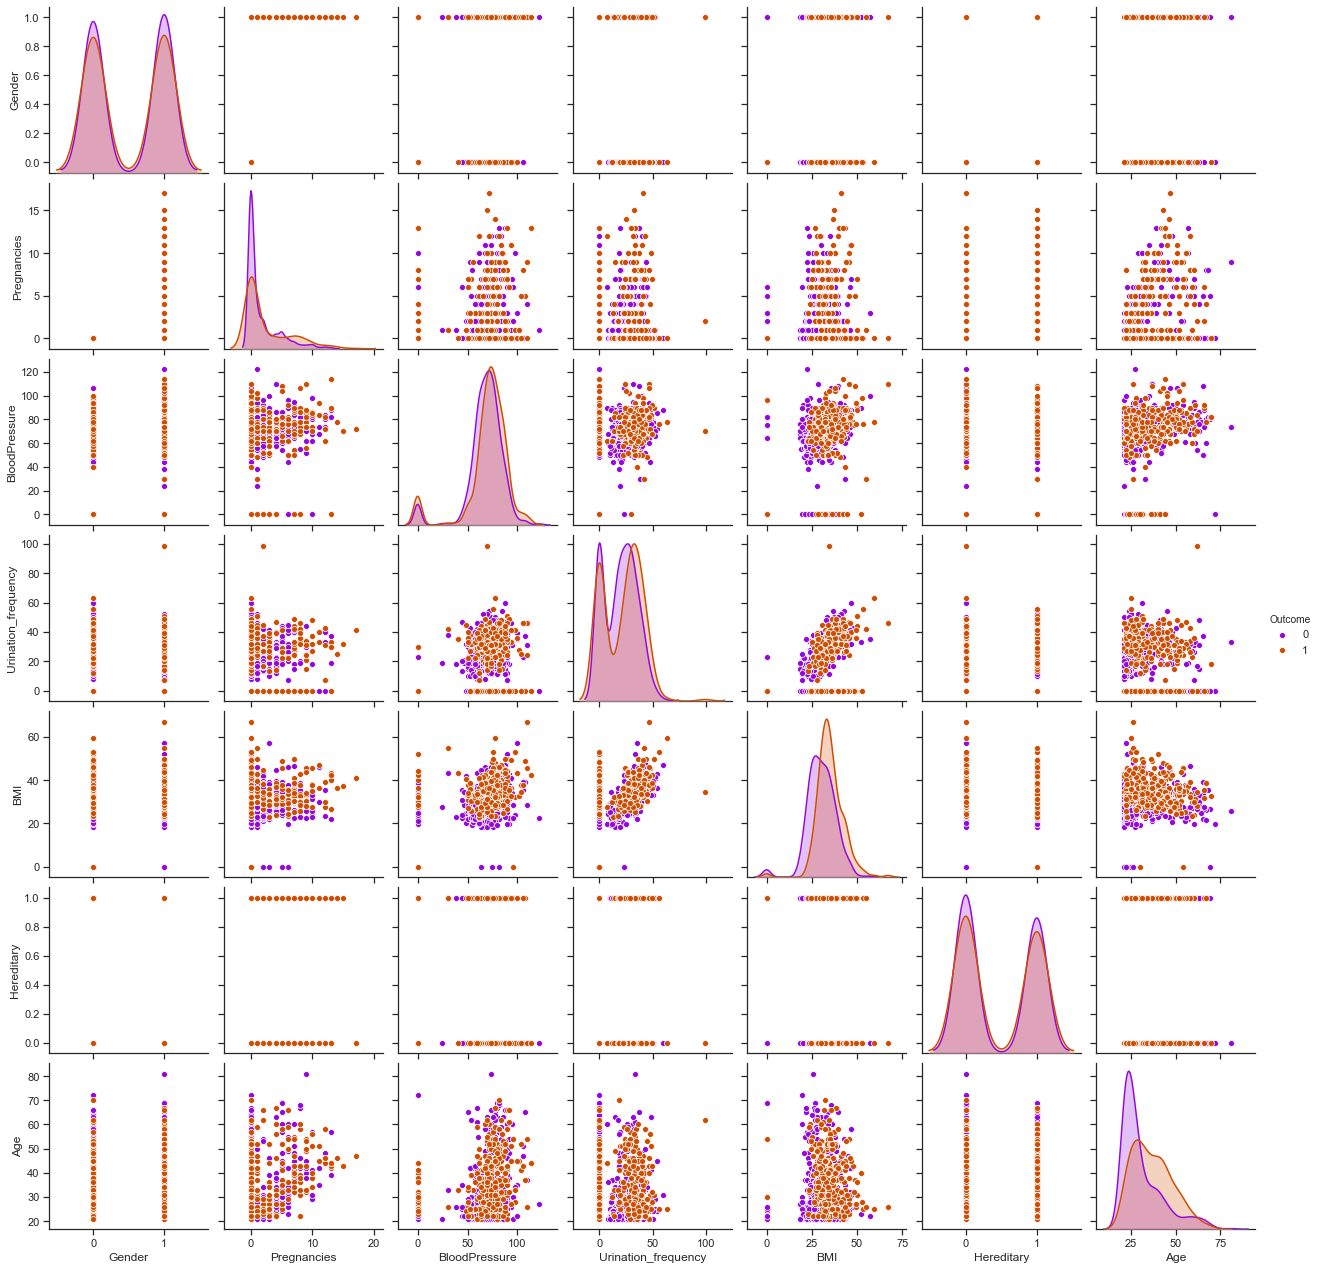

In [15]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,hue='Outcome',palette='gnuplot');

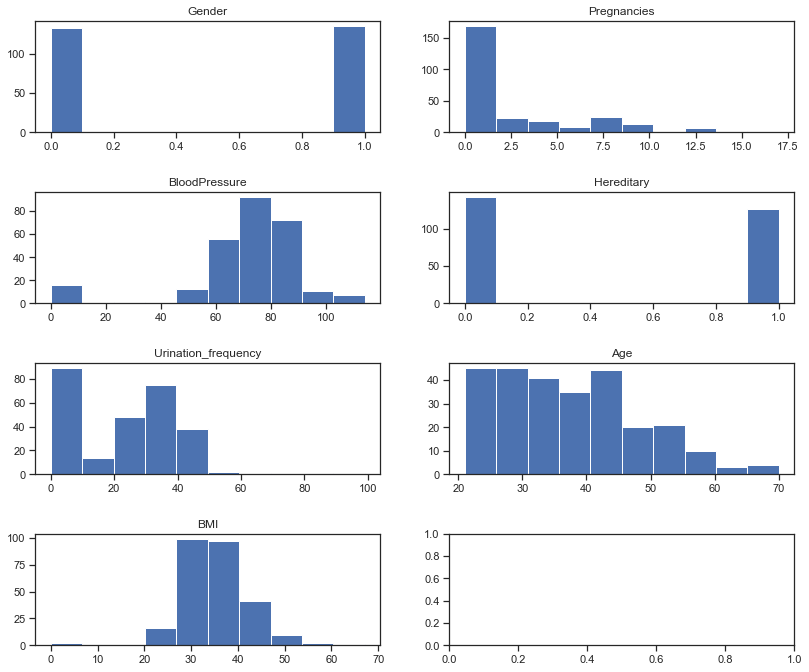

In [16]:


# Histogram of all coloumns when the Outcome is 1(Diabetes)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Gender')
ax[0,0].hist(data.Gender[data.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==1]);
ax[1,0].set_title('BloodPressure')
ax[1,0].hist(data.BloodPressure[data.Outcome==1]);
ax[2,0].set_title('Urination_frequency')
ax[2,0].hist(data.Urination_frequency[data.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(data.BMI[data.Outcome==1]);
ax[1,1].set_title('Hereditary')
ax[1,1].hist(data.Hereditary[data.Outcome==1]);
ax[2,1].set_title('Age')
ax[2,1].hist(data.Age[data.Outcome==1]);

In [17]:
#corelation matrix
data.corr()

,Gender,Pregnancies,BloodPressure,Urination_frequency,BMI,Hereditary,Age,Outcome
Gender,1.000000,0.624109,-0.020437,-0.015682,-0.028618,-0.031465,0.017494,-0.006953
Pregnancies,0.624109,1.000000,0.081245,-0.035374,0.010847,0.010164,0.322508,0.120605
BloodPressure,-0.020437,0.081245,1.000000,0.207390,0.281825,0.024159,0.239699,0.065135
Urination_frequency,-0.015682,-0.035374,0.207390,1.000000,0.392867,0.032110,-0.113312,0.075426
BMI,-0.028618,0.010847,0.281825,0.392867,1.000000,-0.014987,0.036031,0.292612
Hereditary,-0.031465,0.010164,0.024159,0.032110,-0.014987,1.000000,0.013454,0.008822
Age,0.017494,0.322508,0.239699,-0.113312,0.036031,0.013454,1.000000,0.237725
Outcome,-0.006953,0.120605,0.065135,0.075426,0.292612,0.008822,0.237725,1.000000


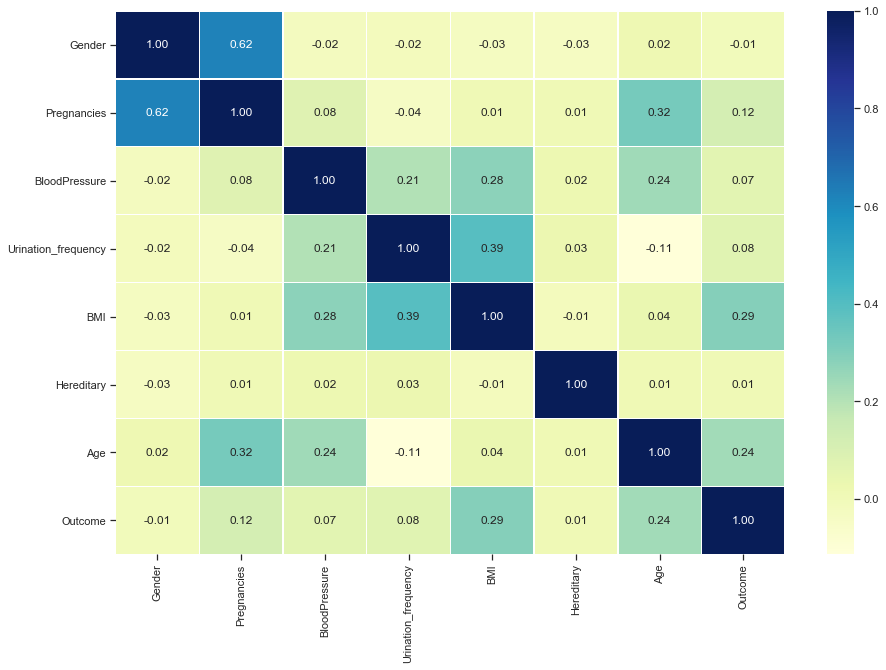

In [18]:
# make our correlation matrix visual
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

# Modeling

In [19]:
#random data shuffelin
data.sample(frac=1)

#Spliting the data
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
X_train,X_test,y_train,y_test =  train_test_split(X,
                                              y,
                                              test_size=0.2)

In [20]:
(len(X_train),len(X_test))

(613, 154)

# Trying Different Models:
            ##1.Logistic Regression
            ##2.KNN
            ##3.Random Forest Classifier
            ##4.Support Vector Machine

In [21]:
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
## Evaluating the model
log_reg = log_reg.score(X_test,y_test)

In [22]:
## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)

In [23]:
## Build an model (Random forest classifier)
clf= RandomForestClassifier()
clf.fit(X_train,y_train);
## Evaluating the model
clf = clf.score(X_test,y_test)

In [24]:
## Build an model (Support Vector Machine)
svm = SVC()
svm.fit(X_train,y_train)
svm = svm.score(X_test,y_test)

,Logistic Regression,KNN,Random Forest Classifier,Support Vector Machine
accuracy,0.681818,0.662338,0.701299,0.733766


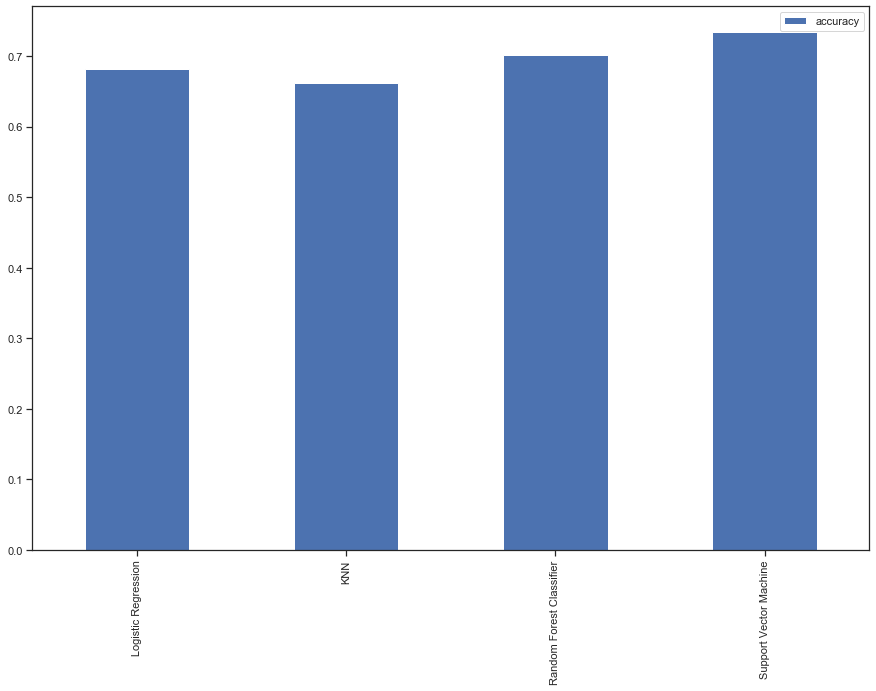

In [27]:
model_compare.T.plot.bar(figsize=(15,10));

## Hyperparameter tuning using RandomizedSearchcv


In [28]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


In [29]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [30]:
score = rs_log_reg.score(X_test,y_test)
score

0.7012987012987013

## Using Grid Search CV Logistic Regression

In [31]:
log_reg_grid = {'C': np.logspace(-4,4,30),
               "solver":["liblinear"]}

#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit grid search cv
gs_log_reg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [32]:
gs_log_reg.score(X_test,y_test)

0.6818181818181818

## Evaluating the tuned model by RandomizedSearchcv

In [33]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [34]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

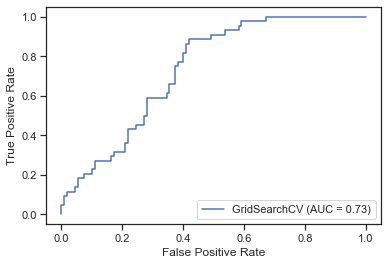

In [35]:
# plot ROC curve
plot_roc_curve(gs_log_reg,X_test,y_test)

In [36]:
#COnfusion matrix
print(confusion_matrix(y_test,y_preds))

[[92 18]
 [31 13]]


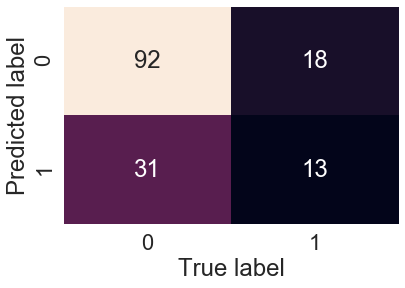

In [37]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [38]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       110
           1       0.42      0.30      0.35        44

    accuracy                           0.68       154
   macro avg       0.58      0.57      0.57       154
weighted avg       0.65      0.68      0.66       154



In [39]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 32.90344562312671, 'solver': 'liblinear'}

In [40]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [41]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="accuracy")
cv_acc

array([0.68831169, 0.68831169, 0.66233766, 0.63636364, 0.62337662,
       0.66233766, 0.7012987 , 0.69736842, 0.68421053, 0.68421053])

In [42]:
cv_acc = np.mean(cv_acc)
cv_acc

0.6728127136021872

In [43]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.5664729225023342

In [44]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.23874643874643872

In [45]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.3312620075604294

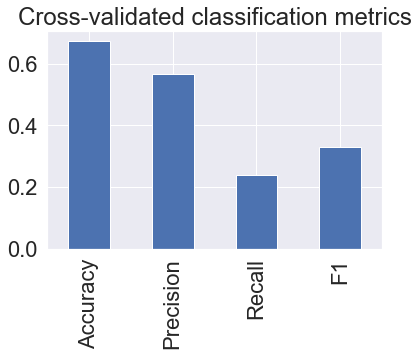

In [46]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [47]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [48]:
clf.coef_

array([[-0.46278268,  0.08038406, -0.01603618,  0.00119825,  0.05458327,
        -0.06153362,  0.02580192]])

In [49]:
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'Gender': -0.46278267856930144,
 'Pregnancies': 0.08038405980656076,
 'BloodPressure': -0.01603618306574152,
 'Urination_frequency': 0.0011982541105625413,
 'BMI': 0.05458327280679599,
 'Hereditary': -0.061533616847716924,
 'Age': 0.025801918067186153}

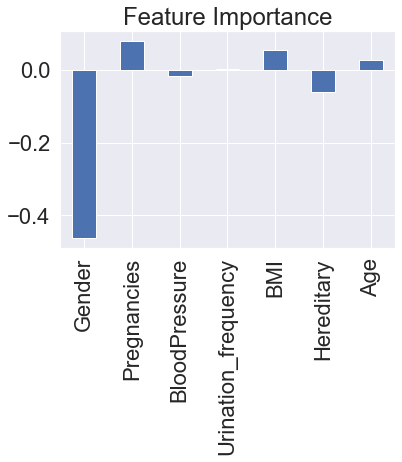

In [50]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

# Loading and Saving a model

In [51]:
import pickle

# Save trained model to file
pickle.dump(gs_log_reg, open("Diabetes.pkl", "wb"))

In [52]:
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)


0.6818181818181818

# Best Model is SVM with 74% accuracy

In [66]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                           "Support Vector Machine":svm,
                            },index=["accuracy"])

In [67]:
model_compare

,Logistic Regression,KNN,Support Vector Machine
accuracy,0.681818,0.662338,0.733766


# Predicting the Outcome Using New data

In [53]:
## Enter the new data
X_test.head(1)

,Gender,Pregnancies,BloodPressure,Urination_frequency,BMI,Hereditary,Age
20,1,3,88,41,39.3,1,27


In [54]:
Gender = input()
Pregnancies = input()
BloodPressure = input()
Urination_frequency = input()
BMI = input()
Hereditary = input()
Age = input()

1
3
90
23
40
1
45


In [59]:
row_df = pd.DataFrame([pd.Series([Gender,Pregnancies,BloodPressure,Urination_frequency,BMI,Hereditary,Age])])

In [60]:
row_df

,0,1,2,3,4,5,6
0,1,3,90,23,40,1,45


In [57]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

The probability of you having Diabetes is 0.6186441673179541
